In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Descriptive Analytics for Numerical Columns

In [2]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [3]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
num_col=df.select_dtypes(include=['int','float']).columns

In [5]:
num_col

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [6]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [7]:
df.shape

(450, 13)

In [8]:
df.size

5850

In [9]:
stats = {}
for column in num_col:
    stats[column] = {
        'Mean': df[column].mean(),
        'Median': df[column].median(),
        'Mode': df[column].mode()[0],
        'STD': df[column].std()
    }
for column, values in stats.items():
    print(f"\n{column}:")
    for stat, value in values.items():
        print(f"{stat}: {value:.2f}")


Volume:
Mean: 5.07
Median: 4.00
Mode: 3.00
STD: 4.23

Avg Price:
Mean: 10453.43
Median: 1450.00
Mode: 400.00
STD: 18079.90

Total Sales Value:
Mean: 33812.84
Median: 5700.00
Mode: 24300.00
STD: 50535.07

Discount Rate (%):
Mean: 15.16
Median: 16.58
Mode: 5.01
STD: 4.22

Discount Amount:
Mean: 3346.50
Median: 988.93
Mode: 69.18
STD: 4509.90

Net Sales Value:
Mean: 30466.34
Median: 4677.79
Mode: 326.97
STD: 46358.66


###### Volume:
* Mean: 5.07 - On average, the volume of sales transactions is around 5.
* Median: 4.00 - Half of the transactions have a volume of 4 or less.
* Mode: 3.00 - The most common volume value is 3.
* STD: 4.23 - The volume values are spread out from the mean by approximately 4.23 units on average.
###### Avg Price:
* Mean: 10453.43 - The average price of products sold is around 10453.43.
* Median: 1450.00 - Half of the products were sold at a price of 1450.00 or less.
* Mode: 400.00 - The most common price is 400.00.
* STD: 18079.90 - The prices are widely spread out from the mean by approximately 18079.90.
###### Total Sales Value:
* Mean: 33812.84 - The average total sales value is around 33812.84.
* Median: 5700.00 - Half of the transactions resulted in a total sales value of 5700.00 or less.
* Mode: 24300.00 - The most common total sales value is 24300.00.
* STD: 50535.07 - The total sales values vary considerably around the mean, with a standard deviation of approximately 50535.07.
###### Discount Rate (%):
* Mean: 15.16% - The average discount rate applied to transactions is approximately 15.16%.
* Median: 16.58% - Half of the transactions had a discount rate of 16.58% or less.
* Mode: 5.01% - The most common discount rate is 5.01%.
* STD: 4.22 - The discount rates vary around the mean by approximately 4.22 percentage points.
###### Discount Amount:
* Mean: 3346.50 - The average discount amount applied to transactions is around 3346.50.
* Median: 988.93 - Half of the transactions had a discount amount of 988.93 or less.
* Mode: 69.18 - The most common discount amount is 69.18.
* STD: 4509.90 - The discount amounts are spread out from the mean by approximately 4509.90.
###### Net Sales Value:
* Mean: 30466.34 - The average net sales value (after applying discounts) is approximately 30466.34.
* Median: 4677.79 - Half of the transactions resulted in a net sales value of 4677.79 or less.
* Mode: 326.97 - The most common net sales value is 326.97.
* STD: 46358.66 - The net sales values vary considerably around the mean, with a standard deviation of approximately $46358.66.

## Data Visualization

* Histograms :

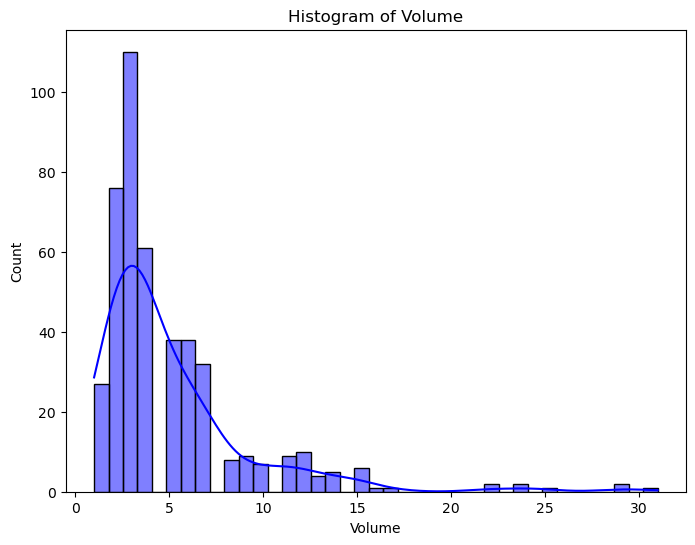

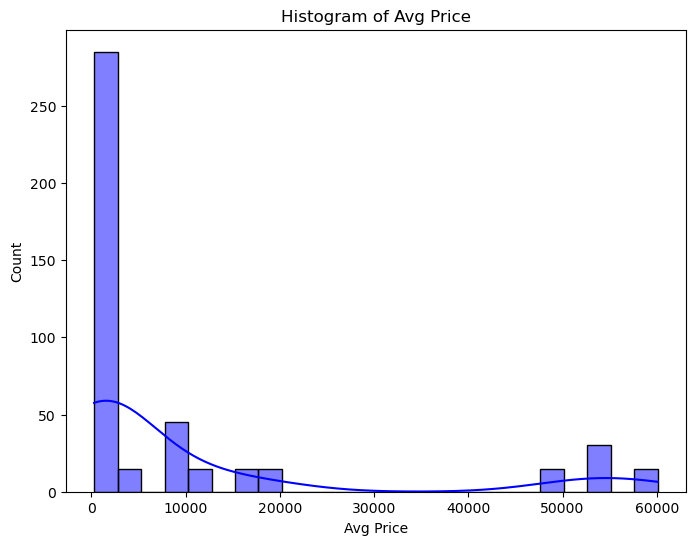

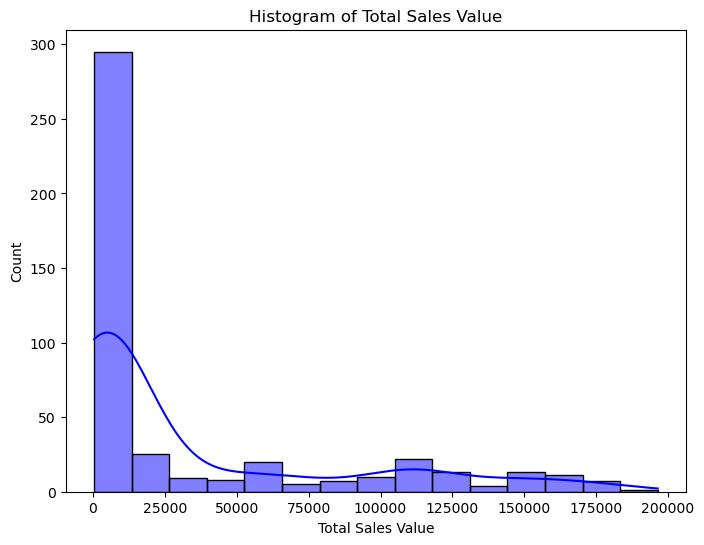

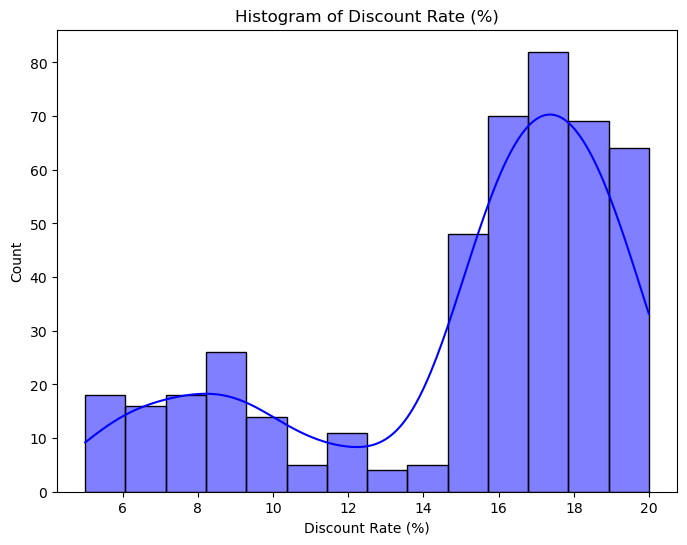

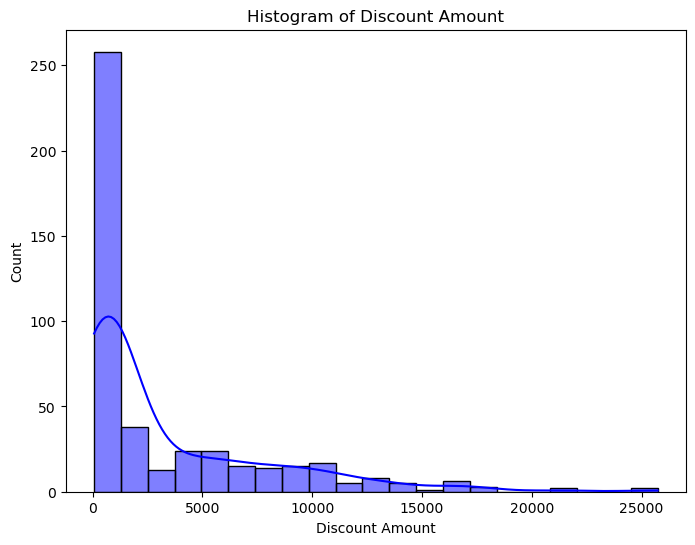

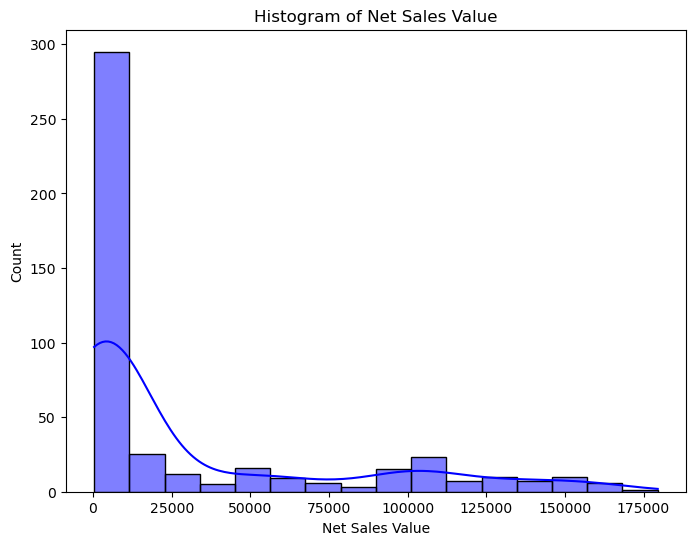

In [10]:
for column in num_col:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=column,kde=True,color="blue") #kde= probability density func line
    plt.title(f'Histogram of {column}')
    plt.show()

* Boxplots :

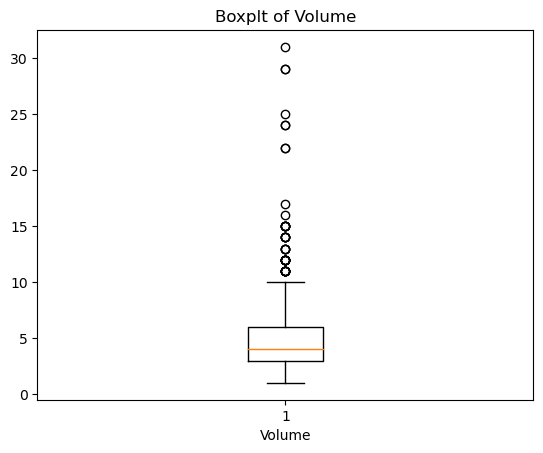

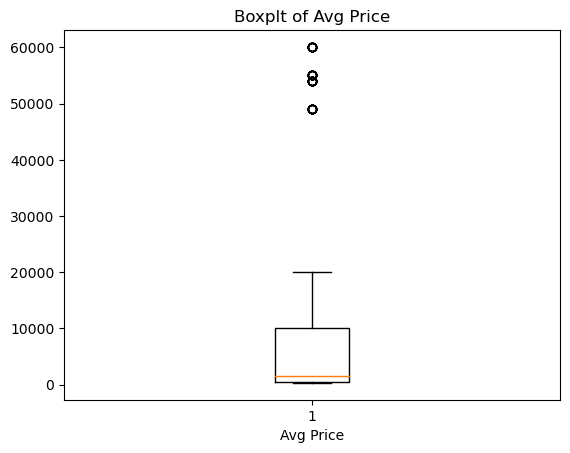

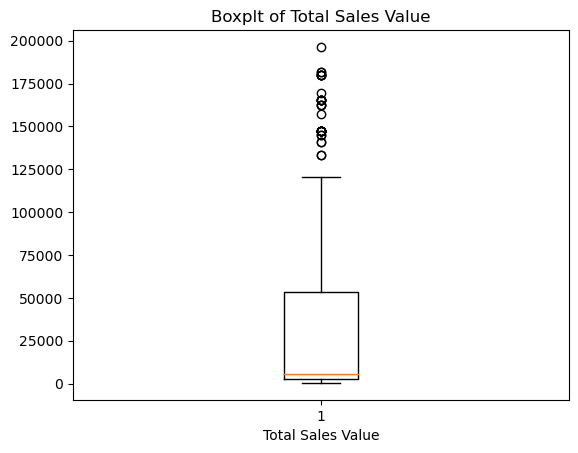

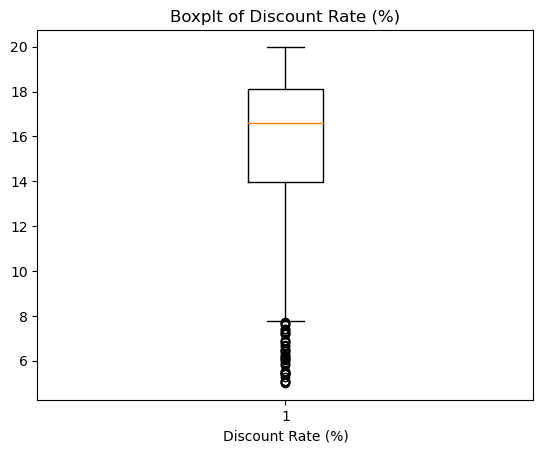

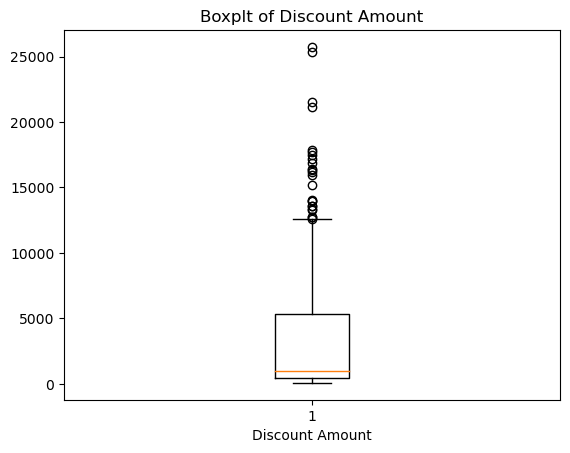

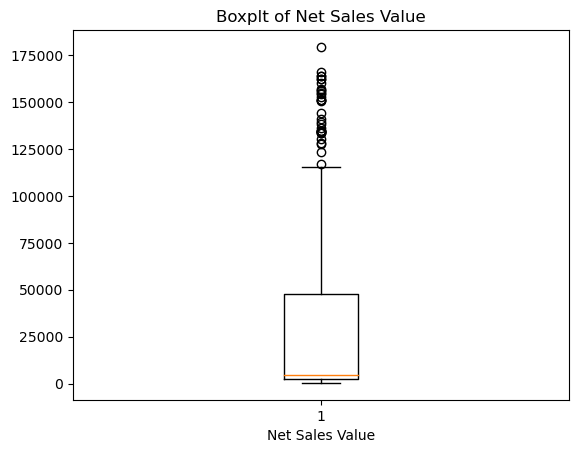

In [11]:
for column in num_col:
    plt.boxplot(x=df[column])
    plt.title(f'Boxplt of {column}')
    plt.xlabel(column)
    plt.show()

##### Every numeric column have outliers by seeing the boxplot, by checking df.describe() it gives Q1,Q3,IQR values.

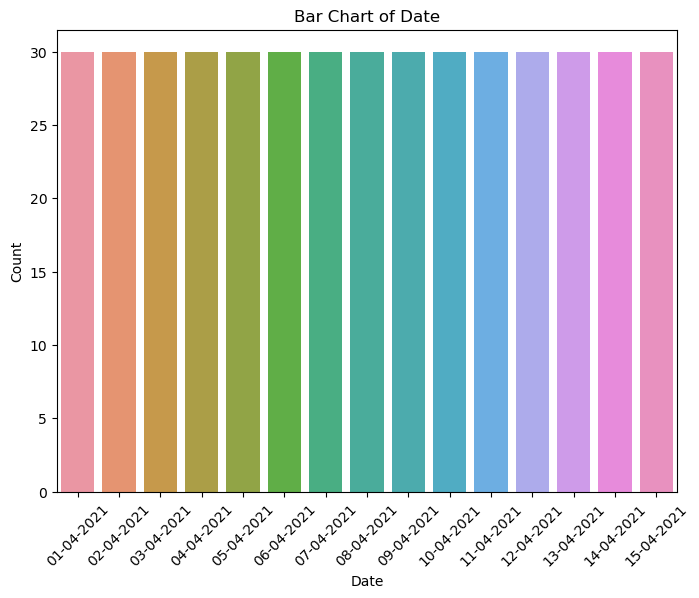

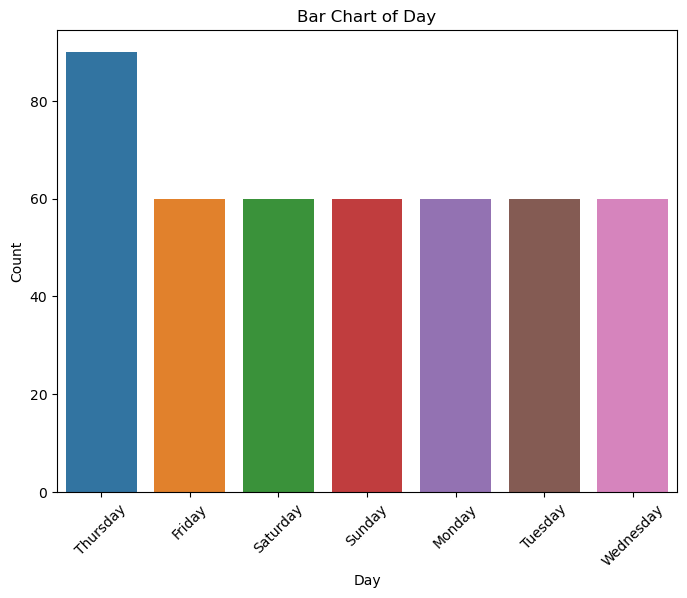

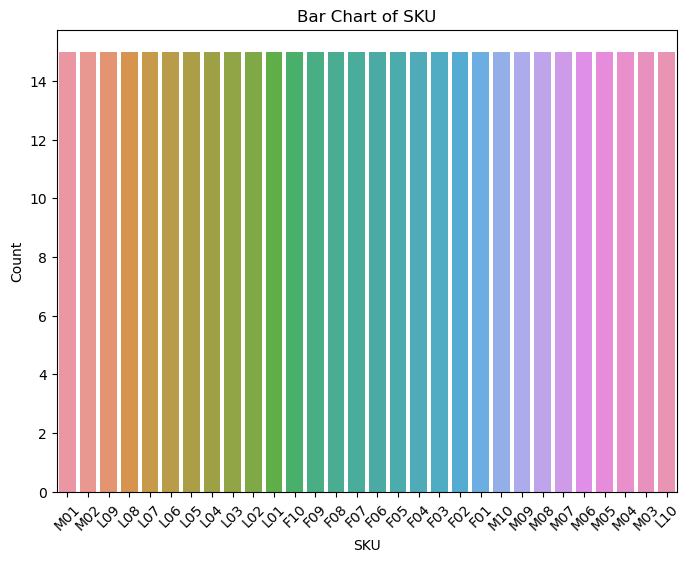

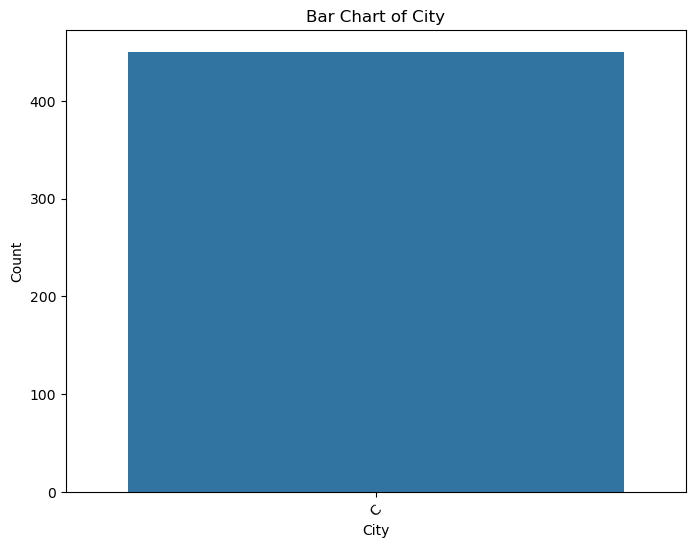

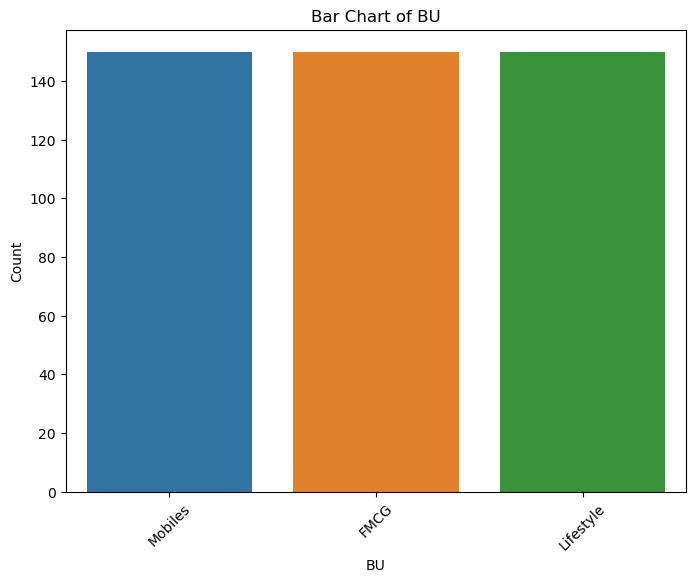

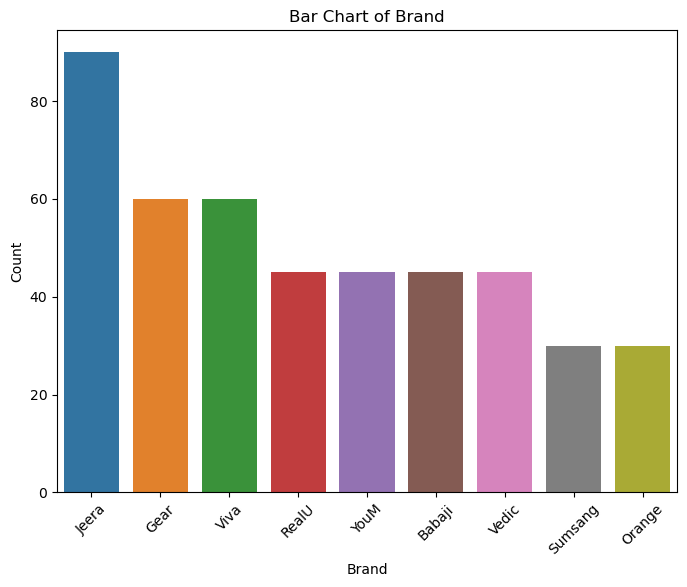

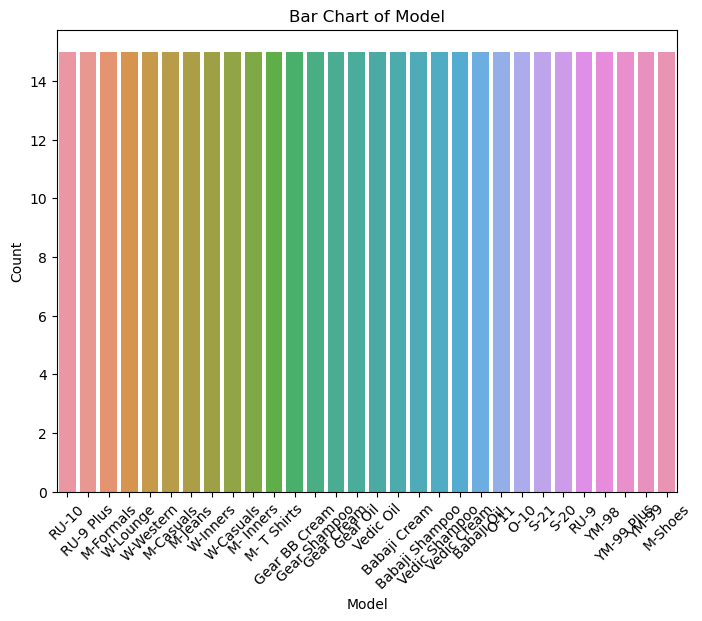

In [12]:
cat_col=df.select_dtypes(include=['object']).columns
for column in cat_col:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=column,order=df[column].value_counts().index)
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Standardization of Numerical Variables

 Standardization, also known as z-score normalization,
is a technique used to scale numerical variables in a dataset to a standard scale, ensuring uniformity and comparability across variables. 
This process transforms the data distribution such that it has a mean of 0 and a standard deviation of 1.
###### formula: z=x-mu/sigma
* z is the standardized value (z-score) of the data point.
* x is the original value of the data point.
* mu is the mean of the variable.
* sigma is the standard deviation of the variable.

###### Process to do Z-test
* Calculate the mean (mu) and standard deviation (sigma) of each numerical column.
* Subtract the mean from each data point in the column.
* Divide each result by the standard deviation.


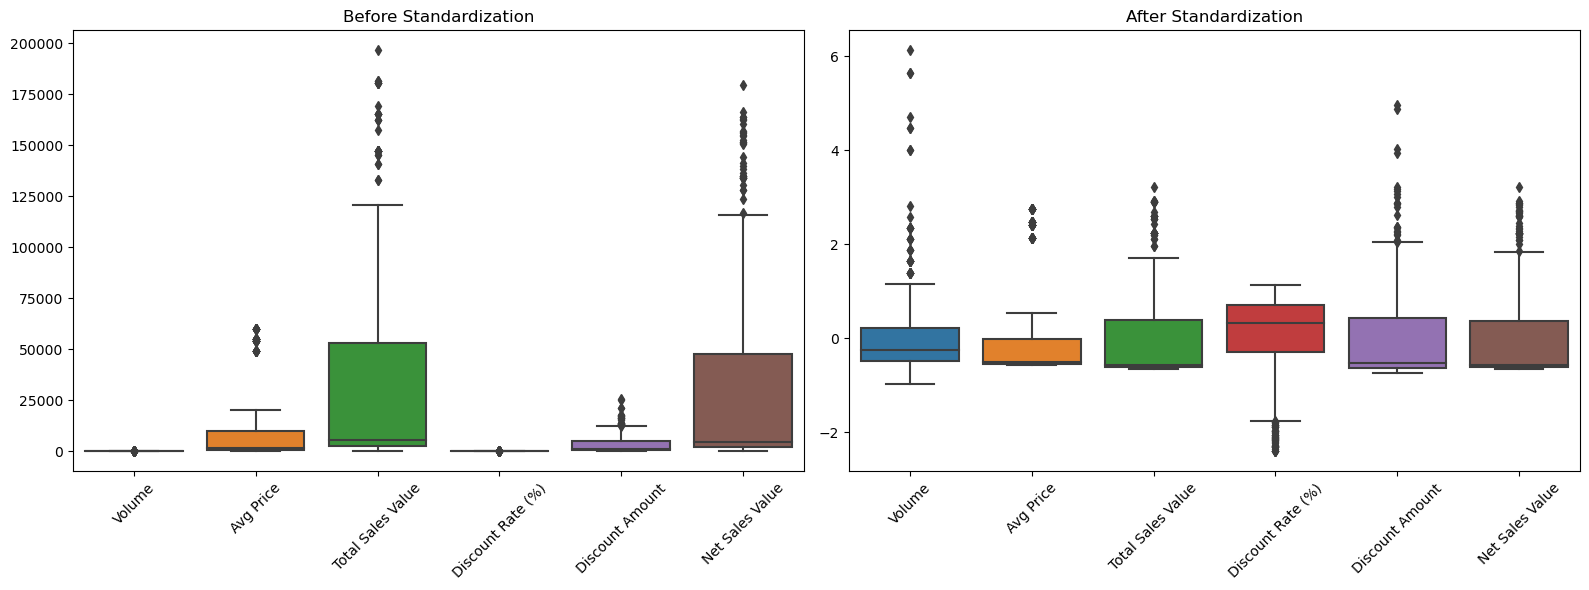

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns =df.select_dtypes(include=['int','float']).columns
means = df[numerical_columns].mean()
stds = df[numerical_columns].std()
standardized_df = (df[numerical_columns] - means) / stds

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[numerical_columns])
plt.title('Before Standardization')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=standardized_df)
plt.title('After Standardization')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Conversion of Categorical Data into Dummy Variables

* In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

* These newly created binary features are known as Dummy variables. The number of dummy variables depends on the levels present in the categorical variable.

In [29]:
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [30]:
categorical_columns=df.select_dtypes(include=['object','category']).columns

In [31]:
categorical_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [32]:
df[categorical_columns]

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [33]:
onehot_encoder=OneHotEncoder(drop='first',sparse=False)

In [34]:
df_encoded=pd.get_dummies(df,columns=categorical_columns)
df_encoded=df_encoded.astype(int)
print(df_encoded.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500                 11            21153   
1      10      10100             101000                 11            11676   
2       7      16100             112700                  9            10657   
3       6      20100             120600                  6             8364   
4       3       8100              24300                 17             4372   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0           160346                1                0                0   
1            89323                1                0                0   
2           102042                1                0                0   
3           112235                1                0                0   
4            19927                1                0                0   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0                0  ...

In [35]:
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = onehot_encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features)
print(encoded_df.head())

    0    1    2    3    4    5    6    7    8    9   ...   78   79   80   81  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    82   83   84   85   86   87  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  1.0  0.0  0.0  

[5 rows x 88 columns]
